## Practica 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d 

#### Carga de datos

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

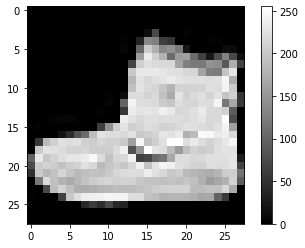

In [4]:
plt.imshow(train_images[0], cmap = 'gray')
plt.colorbar()

Datos a transformar

In [5]:
print(train_images.shape)
print(train_images[0].shape)

(60000, 28, 28)
(28, 28)


In [6]:
image_size = train_images[0].shape[0]
largo = len(train_images)

In [7]:
v_train_images = train_images.reshape(largo,image_size*image_size)

In [8]:
print(v_train_images.shape)
print(v_train_images[0].shape)

(60000, 784)
(784,)


Normalizacion de cada imagen

In [9]:
n_train_images = (v_train_images - np.mean(v_train_images,axis=1)[:,None]) / np.std(v_train_images,axis=1)[:,None]

In [10]:
print(np.std(n_train_images[0]))
print(np.mean(n_train_images[0]))

0.9999999999999999
7.250436079184695e-17


In [11]:
# convresion a matriz para calculo de covarianza
#n_train_images = n_train_images.reshape(largo,image_size,image_size)
n_train_images_T = n_train_images.T
n_train_images_T.shape

(784, 60000)

Matriz de covarianza

In [12]:
sigma = np.cov(n_train_images_T)

Eigenvalues

In [13]:
w_train, U =  np.linalg.eig(sigma)

In [14]:
w_train.shape
#v_train.shape

(784,)

w_train se usa para saber cuantas culumnas son necesarias para representar un porcentaje

100% = sum(w_train)

In [15]:
w_train[0:3] / sum(w_train)

array([0.24988216, 0.09905917, 0.06533492])

In [16]:
sum(w_train[0:3] / sum(w_train))

0.4142762468003504

Seleccion de k columnas

In [17]:
U_reducida = U[0:3]
U_reducida

array([[ 0.00704022, -0.02836521, -0.00559395, ..., -0.01551818,
        -0.00726616, -0.00049013],
       [ 0.0070403 , -0.02836039, -0.00558591, ..., -0.01545526,
        -0.00742226, -0.00045132],
       [ 0.00703041, -0.02834009, -0.00557795, ..., -0.0145892 ,
        -0.00803238,  0.00019753]])

In [18]:
Z = np.dot(n_train_images,U_reducida.T)

In [19]:
Z.shape

(60000, 3)

In [52]:
Z[0:10]

array([[-1.52186969, -0.19458965, -0.67122215],
       [-0.82634343,  0.64334823, -2.2818928 ],
       [-0.73298103,  0.17263036,  0.63481726],
       [-1.06059899,  0.04495689,  0.37612326],
       [-0.88145327,  0.04110499,  0.49281014],
       [-0.7681778 ,  0.95098796, -2.34798951],
       [-1.21752232, -0.33454042,  0.56092794],
       [-0.79189674,  1.09359399, -1.45118864],
       [-0.28137621, -0.04397812,  0.57215801],
       [-0.06863088,  0.38457007, -2.06164008]])

##### Representacion grafica

In [51]:
# Representacion 2D
#plt.scatter(Z[:, 0], Z[:, 1])
#plt.xlabel('component 1')
#plt.ylabel('component 2')


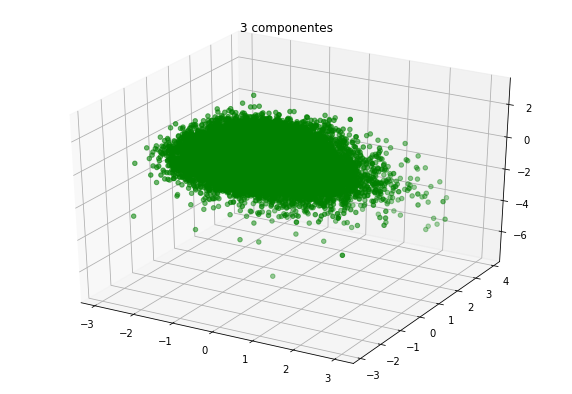

In [24]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], color = "green"); 
plt.title("3 componentes") 
# show plot 
plt.show() 

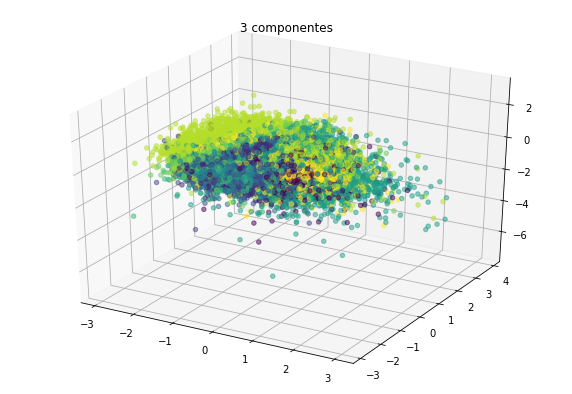

In [25]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2], c = train_labels, alpha=0.5); 
plt.title("3 componentes") 
# show plot 
plt.show() 

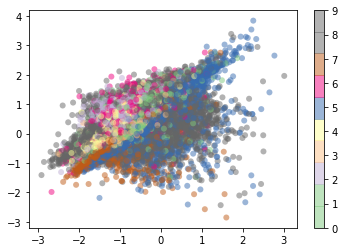

In [50]:
plt.scatter(Z[:, 0], Z[:, 1],
            c=train_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## t-SNE

In [46]:
x_embed = TSNE(n_components = 3).fit_transform(n_train_images)

In [47]:
x_embed.shape

(60000, 3)

In [48]:
x_embed[0:10]

array([[  9.187922 ,  -2.1926162,  12.493164 ],
       [ 17.358822 ,   4.375174 , -12.828275 ],
       [  1.6993856, -11.631273 , -13.38847  ],
       [  5.694158 ,  -7.8919287, -14.0643635],
       [ -1.7068064,  -8.936026 , -11.63047  ],
       [  5.9281664,   3.3791907,   6.8889084],
       [-14.159149 ,  17.240437 ,   6.0292   ],
       [ 11.043382 ,   7.4133277,   1.0225723],
       [ -3.7275844,  -9.0427885,  18.641706 ],
       [ -4.4766674,  -5.28424  ,  14.273684 ]], dtype=float32)

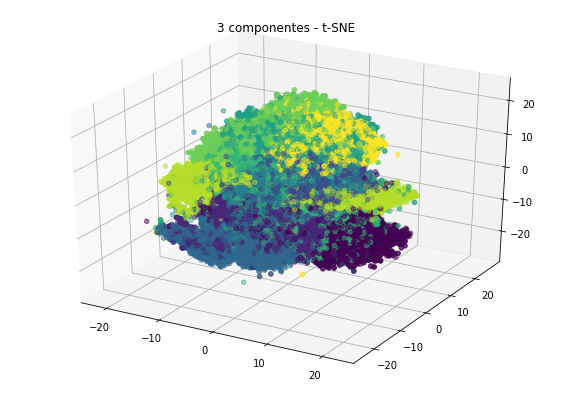

In [49]:
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(x_embed[:, 0], x_embed[:, 1], x_embed[:, 2], c = train_labels, alpha=0.5); 
plt.title("3 componentes - t-SNE") 
plt.show() 

### Comparacion entre ambos metodos

### Clusterin sobre la representacion reducida

In [40]:
temp = n_train_images[0:10]

In [43]:
x_embed = TSNE(n_components = 3).fit_transform(temp)
x_embed[0:2]

array([[-18.68398 , 195.13896 , 267.37595 ],
       [214.26756 ,  50.633057, 167.08913 ]], dtype=float32)

In [44]:
temp = n_train_images[0:30]
x_embed = TSNE(n_components = 3).fit_transform(temp)
x_embed[0:2]

array([[  37.535294 , -295.46234  ,    6.5912848],
       [ -94.683365 ,  192.05551  , -181.19455  ]], dtype=float32)

In [45]:
temp = n_train_images[0:5]
x_embed = TSNE(n_components = 3).fit_transform(temp)
x_embed[0:2]

array([[-154.10915 ,   44.09794 , -335.8832  ],
       [-401.85767 ,  -44.591557,  282.81448 ]], dtype=float32)